<h1><center>Heart Attack Analysis & Prediction Dataset</center><h1>
<h3><center>A dataset for heart attack classification</center><h3>

<b>  

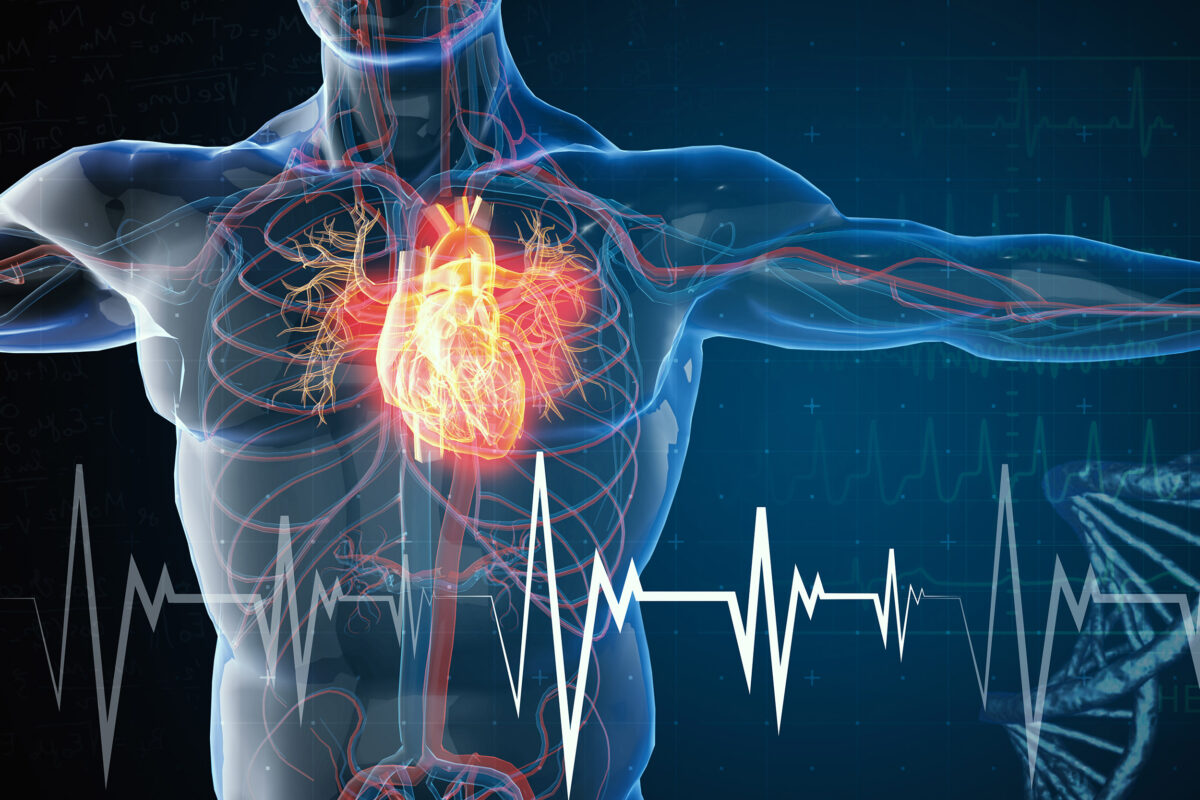

<b> I've tried to create an EASY TO UNDERSTAND notebook. If you like my work please UPVOTE.</b>

<h2><center>Understanding/Goal</center></h2>

A heart attack occurs when an artery supplying your heart with blood and oxygen becomes blocked. Fatty deposits build up over time, forming plaques in your heart's arteries. If a plaque ruptures, a blood clot can form and block your arteries, causing a heart attack.
<br>
<b>In this notebook I will draw some insights out of heart attack data and also evaluate the performace of some machine learning models on the heart attack prediction data.<b>

<h2><center>EDA - Exploratory Data Analysis</center></h2>

In [ ]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import seaborn as sns
# import re
import os
import time
import plotly.express as px

In [ ]:
# Train 
train_df=pd.read_csv("/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv")
train_df.head()

In [ ]:
train_df.info()

##### No missing values

#### Train Data Columns Information
<ol>
    <li>Age : Age of the patient</li>
    <li>Sex : Sex of the patient (1 = male; 0 = female)</li>
    <li>exang: exercise induced angina (1 = yes; 0 = no)</li>
    <li>ca: number of major vessels (0-3)</li>
    <li>cp : Chest Pain type chest pain type</li>
    <ul>
        <li>Value 1: typical angina</li>
        <li>Value 2: atypical angina</li>
        <li>Value 3: non-anginal pain</li>
        <li>Value 4: asymptomatic</li>
    </ul>
    <li>Value 1: typical angina Value 2: atypical angina Value 3: non-anginal pain Value 4: asymptomatic trtbps : resting blood pressure (in mm Hg)</li>
    <li>chol : cholestoral in mg/dl fetched via BMI sensor</li>
    <li>trtbps : resting blood pressure (in mm Hg)</li>
    <li>fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)</li>
    <li>rest_ecg : resting electrocardiographic results</li>
    <ul>
        <li>Value 0: normal</li>
        <li>Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)</li>
        <li>Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria</li>
    </ul>
    <li>thalach : maximum heart rate achieved</li>
    <li>target : 0= less chance of heart attack 1= more chance of heart attack</li>
</ol>

In [ ]:
# age to count plot
plt.figure(figsize=(18,10))
plt.style.use("ggplot")
sns.countplot(x=train_df["age"])    #using countplot
plt.title("Age to Count Plot",fontsize=20)
plt.xlabel("AGE",fontsize=20)
plt.ylabel("COUNT",fontsize=20)
plt.show()

People age above 40 and below 68 are more likely to get heart attack. People at the age of 58 are highly prone to heart attacks.

In [ ]:
# correlation among the variables
plt.figure(figsize=(18,8))
sns.heatmap(train_df.corr(),annot=True,cmap="PuBuGn")

In [ ]:
# Male to Female Heart Attack Count
data=train_df["sex"].value_counts().reset_index()
px.pie(data,names=["Male","Female"],values='sex',color_discrete_sequence=px.colors.sequential.RdBu)

In [ ]:
# Chest pain type and patient count
chest_pain_count=train_df["cp"].value_counts().reset_index()
chest_pain_count

In [ ]:
plt.figure(figsize=(20,10))
plt.style.use("ggplot")
sns.barplot(x=chest_pain_count["index"],y=chest_pain_count["cp"])   
plt.title("TYPE OF CHEST PAIN WITH NUMBER OF PATIENTS",fontsize=20)
plt.xlabel("CHEST PAIN TYPE",fontsize=20)
plt.ylabel("COUNT",fontsize=20)
plt.show()

Most of the people are suffering from 'typical angina' type chest pain

In [ ]:
# Blood Pressure distribution among patients
plt.figure(figsize=(20,10))
plt.style.use("ggplot")
sns.displot(train_df["trtbps"])   #using displot here
plt.title("DISTRIBUTION OF BLOOD PRESSURE AMONG PATIENTS",fontsize=18)
plt.xlabel("BLOOD PRESSURE",fontsize=20)
plt.ylabel("COUNT",fontsize=20)
plt.show()

In [ ]:
# Cholestrol distribution vs patients count
plt.figure(figsize=(40,60))
plt.style.use("ggplot")
sns.set_color_codes()
sns.displot(train_df["chol"],color="y")
plt.title("DISTRIBUTION OF CHOLESTROL LEVEL AMONG PATIENTS",fontsize=18)
plt.xlabel("CHOLESTROL LEVEL",fontsize=20)
plt.ylabel("COUNT",fontsize=20)
plt.show()

In [ ]:
# Heart rate vs patient count
plt.figure(figsize=(20,10))
plt.style.use("ggplot")
sns.displot(train_df["thalachh"],color="blue")
plt.title("DISTRIBUTION OF HEART RATE AMONG PATIENTS",fontsize=18)
plt.xlabel("HEART RATE",fontsize=20)
plt.ylabel("COUNT",fontsize=20)
plt.show()

In [ ]:
plt.figure(figsize=(12,8))
plt.style.use("ggplot")
sns.histplot(data = train_df, x = 'age', hue = 'output')
plt.title("AGE EFFECT ON THE HEART-ATTACK")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

##### Inference
<ul>
    <li>In general, 40 to 58 aged people have more chance of heart attack.</li>
    <li>Most Common Chest Pain - Non-anginal type</li>
    <li>Resting Blood Pressure - range of 120 to 140</li>
    <li>Cholesterol level - 200 to 260</li>
    </ul>

<h2><center>Prediction Models</center></h2>

In [ ]:
# Libraries
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb

In [ ]:
train_df.drop_duplicates(inplace=True)
train_df.reset_index(drop=True, inplace=True)

In [ ]:
train_df.reset_index(drop=True,inplace=True)
train_df.head()

In [ ]:
#Standardization
x = train_df.iloc[:, :-1].values
y = train_df.iloc[:, -1].values
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
#Machine Learning Models
key = ['LogisticRegression','KNeighborsClassifier','SVC','DecisionTreeClassifier','RandomForestClassifier','GradientBoostingClassifier','AdaBoostClassifier','XGBClassifier']
value = [LogisticRegression(),KNeighborsClassifier(),SVC(),DecisionTreeClassifier(),RandomForestClassifier(),GradientBoostingClassifier(),AdaBoostClassifier(),xgb.XGBClassifier()]
models = dict(zip(key,value))

In [ ]:
predicted =[]
for name,algo in models.items():
    model=algo
    model.fit(x_train,y_train)
    predict = model.predict(x_test)
    acc = accuracy_score(y_test, predict)
    predicted.append(acc)
    print(name,acc)

In [ ]:
plt.figure(figsize = (10,5))
sns.barplot(x = predicted, y = key)
# plt.show()

<b> From above we can see that the best accucary is of SVC model ~93%. </b>